In [1]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [2]:
#fetching the stockprices
df = web.DataReader('AAPL',data_source='yahoo',start='2012-01-01',end='2019-12-17')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.575915
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.643498
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.783868
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.917507
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.897018
...,...,...,...,...,...,...
2019-12-11,67.775002,67.125000,67.202499,67.692497,78756800.0,66.616821
2019-12-12,68.139999,66.830002,66.945000,67.864998,137310400.0,66.786591
2019-12-13,68.824997,67.732498,67.864998,68.787498,133587600.0,67.694443


In [3]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.575915
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.643498
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.783868
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.917507
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.897018
...,...,...,...,...,...,...
2019-12-11,67.775002,67.125000,67.202499,67.692497,78756800.0,66.616821
2019-12-12,68.139999,66.830002,66.945000,67.864998,137310400.0,66.786591
2019-12-13,68.824997,67.732498,67.864998,68.787498,133587600.0,67.694443


In [7]:
#Getting the shape of tabele 
df.shape

(2003, 6)

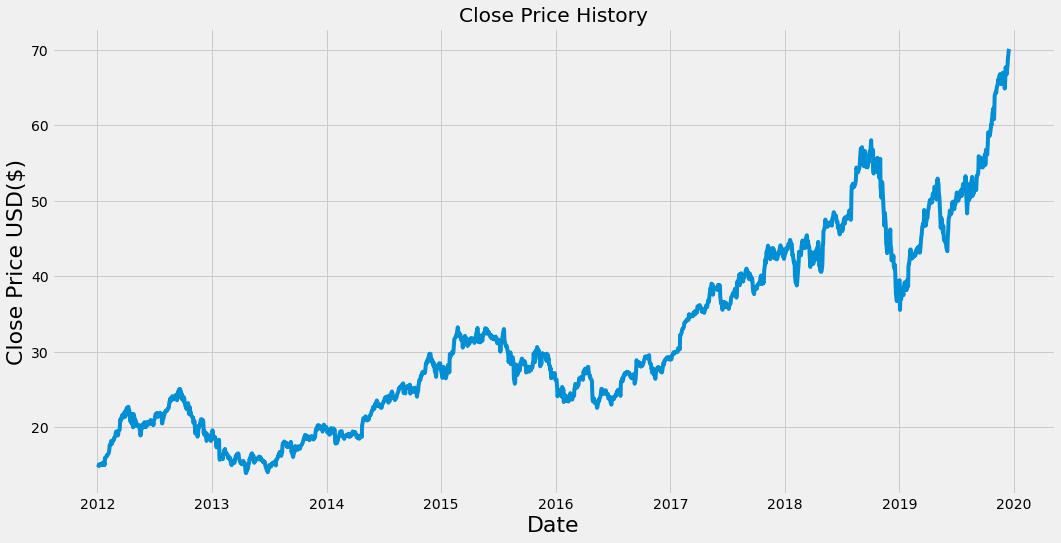

In [8]:
#plotting the data on graph using the closing price 
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=22)
plt.ylabel('Close Price USD($)',fontsize=22)
plt.show()

In [9]:
#making a data frame with only closing price
data=df.filter(['Close'])
#converting it to s numpy array
dataset=data.values
#finding the number of rows to train model on
training_data_len= math.ceil(len(dataset) * .8)

training_data_len

1603

In [10]:
#scale the data
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)
#fit_tranform computes min and max values tobe used for scaling and transforms them 

scaled_data

array([[0.01316509],
       [0.01457063],
       [0.01748985],
       ...,
       [0.97658263],
       [0.99755134],
       [1.        ]])

In [11]:
#Creating the training data set

train_data=scaled_data[0:training_data_len,:]

#split the data into x_train and y_train data sets

x_train =[]  #independent training variables
y_train=[]  #target variable

#
for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=60:

    print(x_train)
    print(y_train)
    print()

[array([0.01316509, 0.01457063, 0.01748985, 0.02026915, 0.01984303,
       0.02080338, 0.02036454, 0.01962679, 0.01862191, 0.02173194,
       0.02453668, 0.02367172, 0.01893355, 0.02345548, 0.01900352,
       0.03569838, 0.03440732, 0.0360927 , 0.03973694, 0.04194384,
       0.0417594 , 0.0410789 , 0.04397903, 0.04670744, 0.04979839,
       0.05479095, 0.0652785 , 0.06543749, 0.07127594, 0.07563885,
       0.06814049, 0.07102789, 0.07097066, 0.07906688, 0.07791571,
       0.08004628, 0.08387497, 0.08600558, 0.09214292, 0.09661394,
       0.09790501, 0.09835659, 0.09071194, 0.08886753, 0.08914103,
       0.09632778, 0.09835024, 0.10269409, 0.11293358, 0.12659476,
       0.12403805, 0.1240444 , 0.13392141, 0.13701237, 0.13481179,
       0.13280207, 0.13070964, 0.13766105, 0.14243103, 0.14442805])]
[0.13949272033425864]



In [12]:
#convert train data to numpy arrays
x_train,y_train=np.array(x_train),np.array(y_train)



In [13]:
#Reshaping the data from 2 demensional to 3 demensional for the data set
x_train.shape


x_train=np.reshape(x_train,(1543,60,1))
x_train.shape

(1543, 60, 1)

In [14]:
# build LSTM model
model=Sequential()
#giving 50 neurons in this layer,retun statement is true casuse we use another layer
#input shape is no of time steps and features
model.add(LSTM(50,return_sequences=True,input_shape=(60,1)))
#gving 50 neurons in this layer,retun statement is False as we dont use any more layers
model.add(LSTM(50,return_sequences=False))
#giving 25 neurons
model.add(Dense(25))
#with 1 neuron
model.add(Dense(1))


In [15]:
#copiling the model by using adam optimizer  
model.compile(optimizer='adam',loss='mean_squared_error')


In [16]:
#train the model
model.fit(x_train,y_train,batch_size=1,epochs=1)

1543/1543 [==============================] - 22s 13ms/step - loss: 8.9495e-04


In [17]:
#creating a testing data set
#creating a new array containing scaled values from index 1543 to 2003
test_data=scaled_data[training_data_len - 60:,:]
#create the data sets x_test and y_test
#x_test contains 60 values of prediction 
x_test=[]
#y_test contains all the test data 
y_test=dataset[training_data_len:,:]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])
  

In [18]:
#converting the data to a numpy array so that it can be used in lstm model
x_test=np.array(x_test)
#reshaping to 3 demensional from 2 
#x_test.shape[0]= no of rows,steps,.shape[1]= no of columns
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))


In [19]:
#getting the models predicted price values
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)


In [85]:
#Getting the root mean squared error(RMSE) to help find the accuracy
rmse=np.sqrt( np.mean((predictions - y_test)**2))
rmse

1.62419050483362

C:\Users\viraj\AppData\Local\Temp/ipykernel_16568/2262445347.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']=predictions


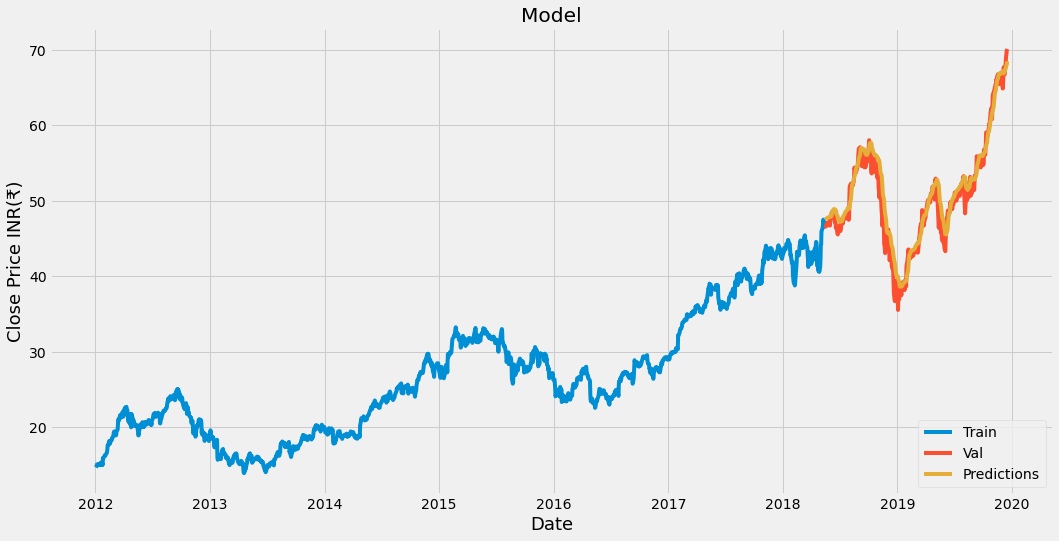

In [86]:
train=data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']=predictions

#visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price INR(₹)',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show()

In [87]:
#show the valid and predicted prices to compare the prices
valid

,Close,Predictions
Date,,
2018-05-17,46.747501,47.502880
2018-05-18,46.577499,47.613449
2018-05-21,46.907501,47.656353
2018-05-22,46.790001,47.695484
2018-05-23,47.090000,47.716293
...,...,...
2019-12-11,67.692497,67.307785
2019-12-12,67.864998,67.511414
2019-12-13,68.787498,67.734283
